In [2]:
import numpy as np
import matplotlib.pyplot as plt


<h1>Histograms!</h1>

In [47]:
# Generate some data to plot with!
np.random.seed(70)
x1 = np.random.normal(1, 1.11, 400) + np.random.beta(2, 5, 400)
x2 = np.random.normal(10, .5, 400)
x3 = np.random.normal(5, 1, 400)
x = np.concatenate((x1, x2, x3))

<h1>Get Optimal Number of Bins Using Freedman-Diaconis Rule</h1>

In [48]:
opt_bin_width = 2 * (np.quantile(x, .75) - np.quantile(x, .25))/np.cbrt(len(x))
opt_bin_width

1.4303876051024769

In [49]:
opt_bins = round(max(x) - min(x)/int(opt_bin_width))
opt_bins

14

<h1>Plot our histograms!</h1>

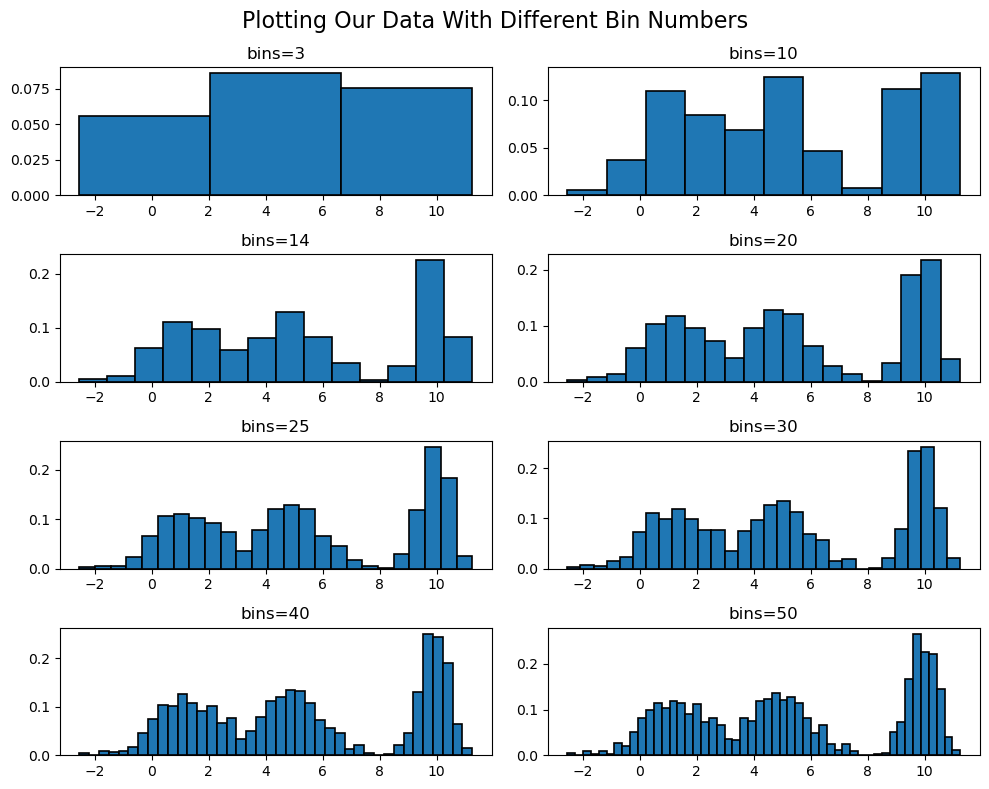

In [50]:
fig, ax = plt.subplots(4, 2, figsize=(10, 8), dpi=100)
bin_nums_to_try = [3, 10, 14, 20, 25, 30, 40, 50]

for bins in bin_nums_to_try:
    ax[bin_nums_to_try.index(bins) // 2][bin_nums_to_try.index(bins) % 2].hist(x, bins=bins, edgecolor='black', linewidth=1.2, density=True)
    ax[bin_nums_to_try.index(bins) // 2][bin_nums_to_try.index(bins) % 2].set_title(f'bins={bins}')
    
plt.suptitle('Plotting Our Data With Different Bin Numbers', fontsize=16)
plt.tight_layout()
plt.show()

<h1>KDEs!</h1>

[]

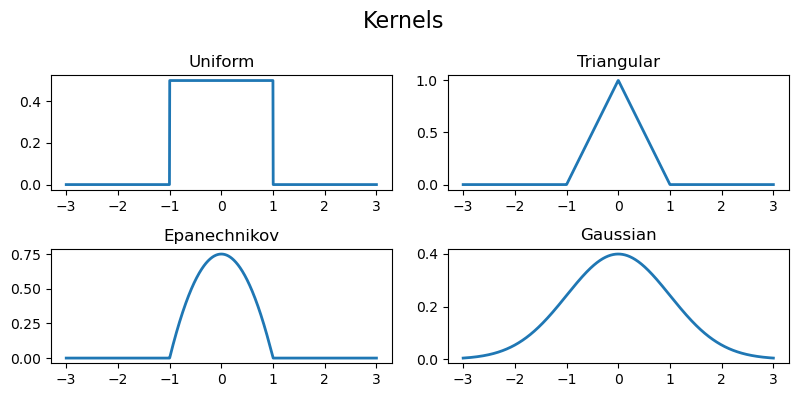

In [69]:
# Define the four kernels discussed
uniform = np.vectorize(lambda x: 0.5 * np.where(np.abs(x) <= 1, 1, 0))
triangular = np.vectorize(lambda x: (1 - np.abs(x))*np.where(-1 <= x <= 1, 1, 0))
epanechnikov = np.vectorize(lambda x: (3/4)*(1 - x**2)*np.where(-1 <= x <= 1, 1, 0))
gaussian = np.vectorize(lambda x: (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2))

# Visualize these kernels
fig, ax = plt.subplots(2, 2, figsize=(8, 4), dpi=100)
kde_x = np.linspace(-3, 3, 1200)
for kernel, name, loc in zip([uniform, triangular, epanechnikov, gaussian], ['Uniform', 'Triangular', 'Epanechnikov', 'Gaussian'], [[0, 0], [0, 1], [1, 0], [1, 1]]):
    ax[loc[0], loc[1]].plot(kde_x, kernel(kde_x), linewidth=2)
    ax[loc[0], loc[1]].set_title(name)
    
plt.suptitle('Kernels', fontsize=16)
plt.tight_layout()
plt.plot()

In [58]:
def kde(x, data, h, kernel):
    """
    Compute the Kernel Density Estimate (KDE) at one or multiple points.

    Parameters:
    - x (float or array-like): The point(s) at which to estimate the KDE.
    - data (array-like): The dataset used for the KDE estimation.
    - h (float): The bandwidth, controlling the smoothness of the estimate.
    - kernel (function): The kernel function used for weighting data points.

    Returns:
    - float or array-like: The KDE estimate(s) at the specified point(s).
    """
    # If we are estimating the value of a single point
    if np.isscalar(x):
        return np.sum(kernel((x - data) / h)) / (len(data) * h)
    # If we are estimating the value of multiple points
    else:
        return [np.sum(kernel((xi - data) / h), axis=0) / (len(data) * h) for xi in x]

print(kde(0, x, 1, gaussian))

0.06389163803786929


<h2>Uniform Kernel</h2>

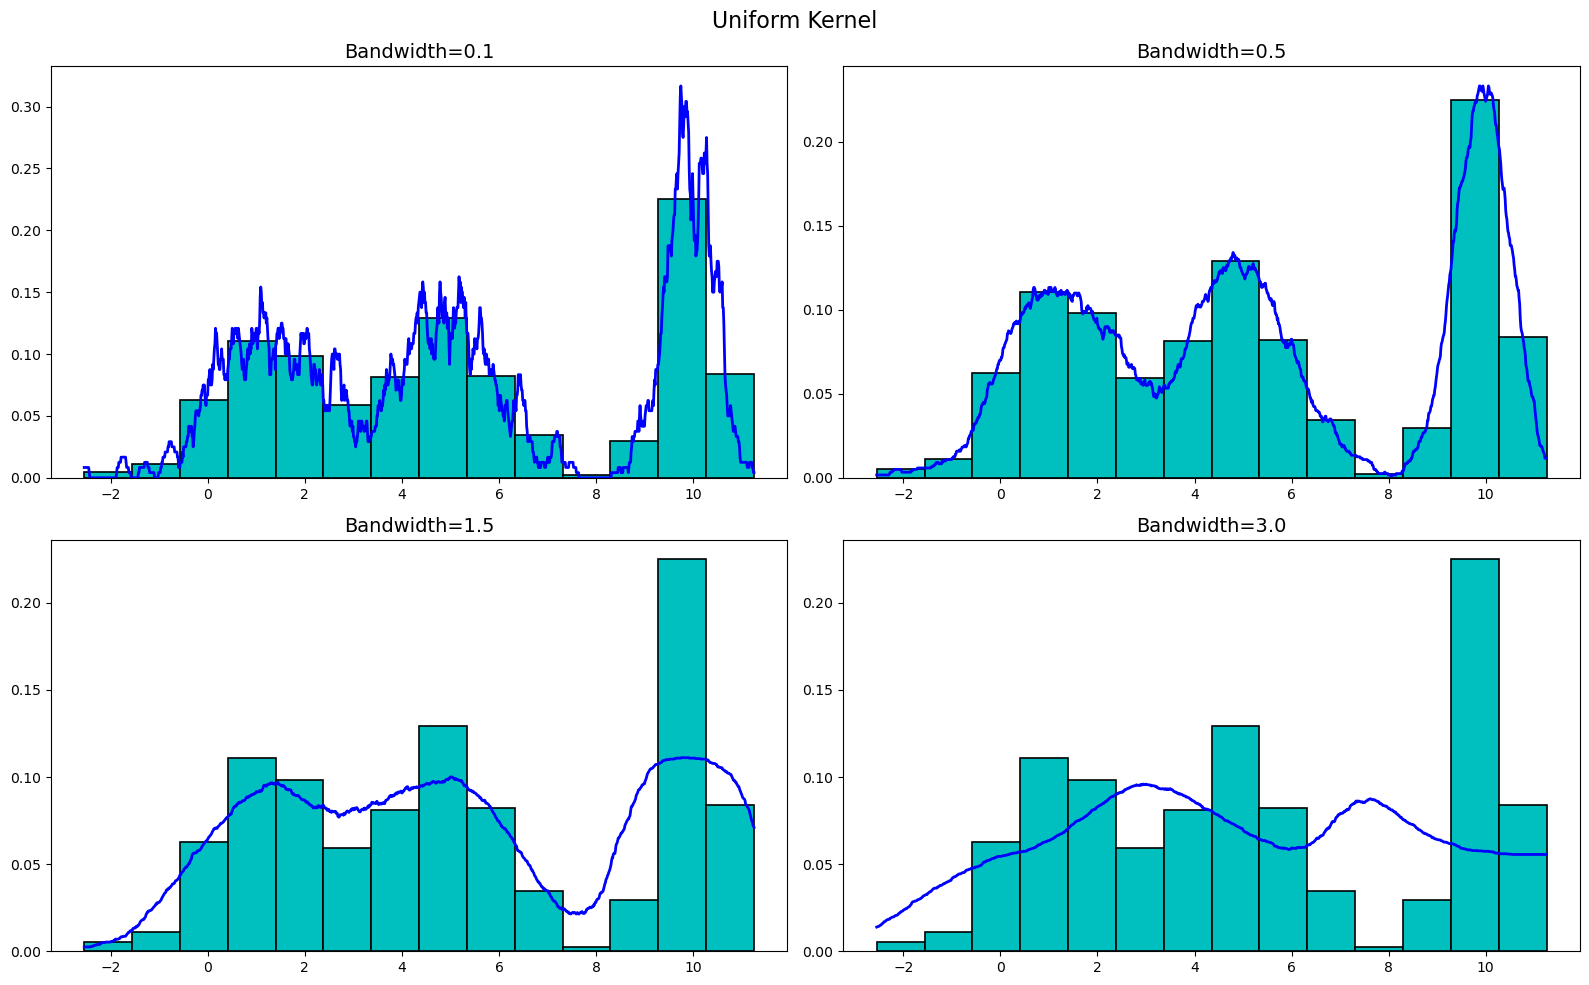

In [67]:
# Define initial variables
bandwidths = [0.1, 0.5, 1.5, 3.0]
x_vals = np.linspace(min(x), max(x), 1200)

# Plot the unform kernel KDE
fig, ax = plt.subplots(2, 2, figsize=(16, 10), dpi=100)
for bw in bandwidths:
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].plot(x_vals, kde(x_vals, x, bw, uniform), 'b', linewidth=2)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].hist(x, bins=14, color='c', edgecolor='black', linewidth=1.2, density=True)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].set_title(f'Bandwidth={bw}', fontsize=14)

plt.suptitle('Uniform Kernel', fontsize=16)
plt.tight_layout()
plt.show()

<h2>Triangular Kernel</h2>

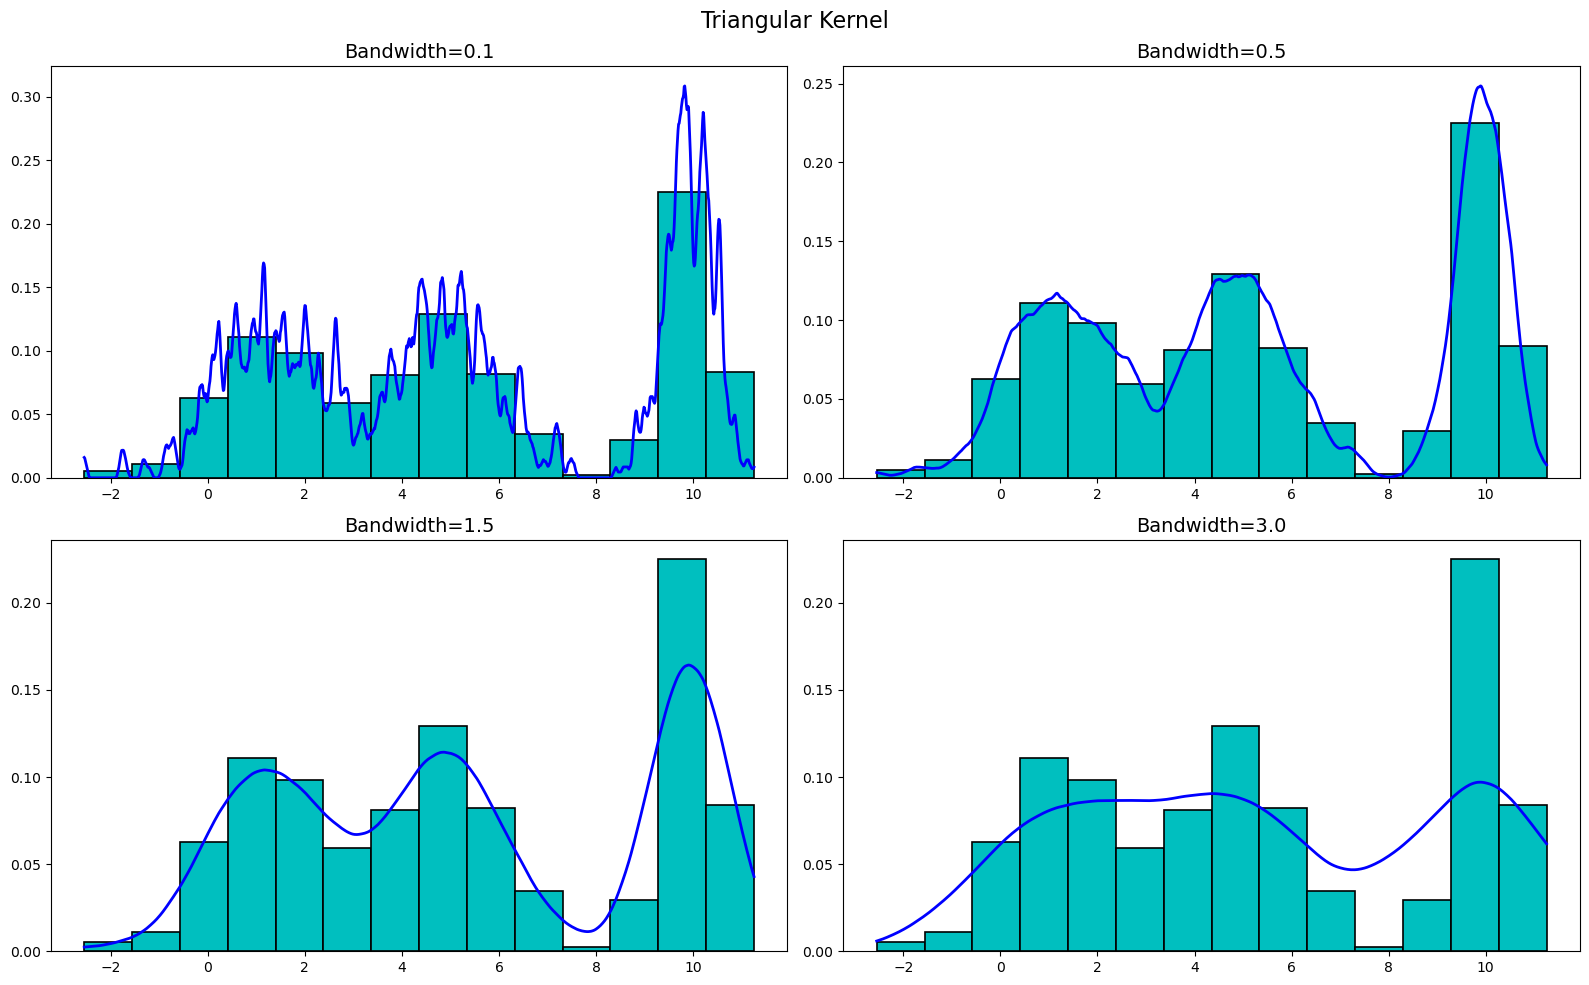

In [70]:
# Define initial variables
bandwidths = [0.1, 0.5, 1.5, 3.0]
x_vals = np.linspace(min(x), max(x), 1200)

# Plot the unform kernel KDE
fig, ax = plt.subplots(2, 2, figsize=(16, 10), dpi=100)
for bw in bandwidths:
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].plot(x_vals, kde(x_vals, x, bw, triangular), 'b', linewidth=2)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].hist(x, bins=14, color='c', edgecolor='black', linewidth=1.2, density=True)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].set_title(f'Bandwidth={bw}', fontsize=14)

plt.suptitle('Triangular Kernel', fontsize=16)
plt.tight_layout()
plt.show()

<h2>Epanechnikov Kernel</h2>

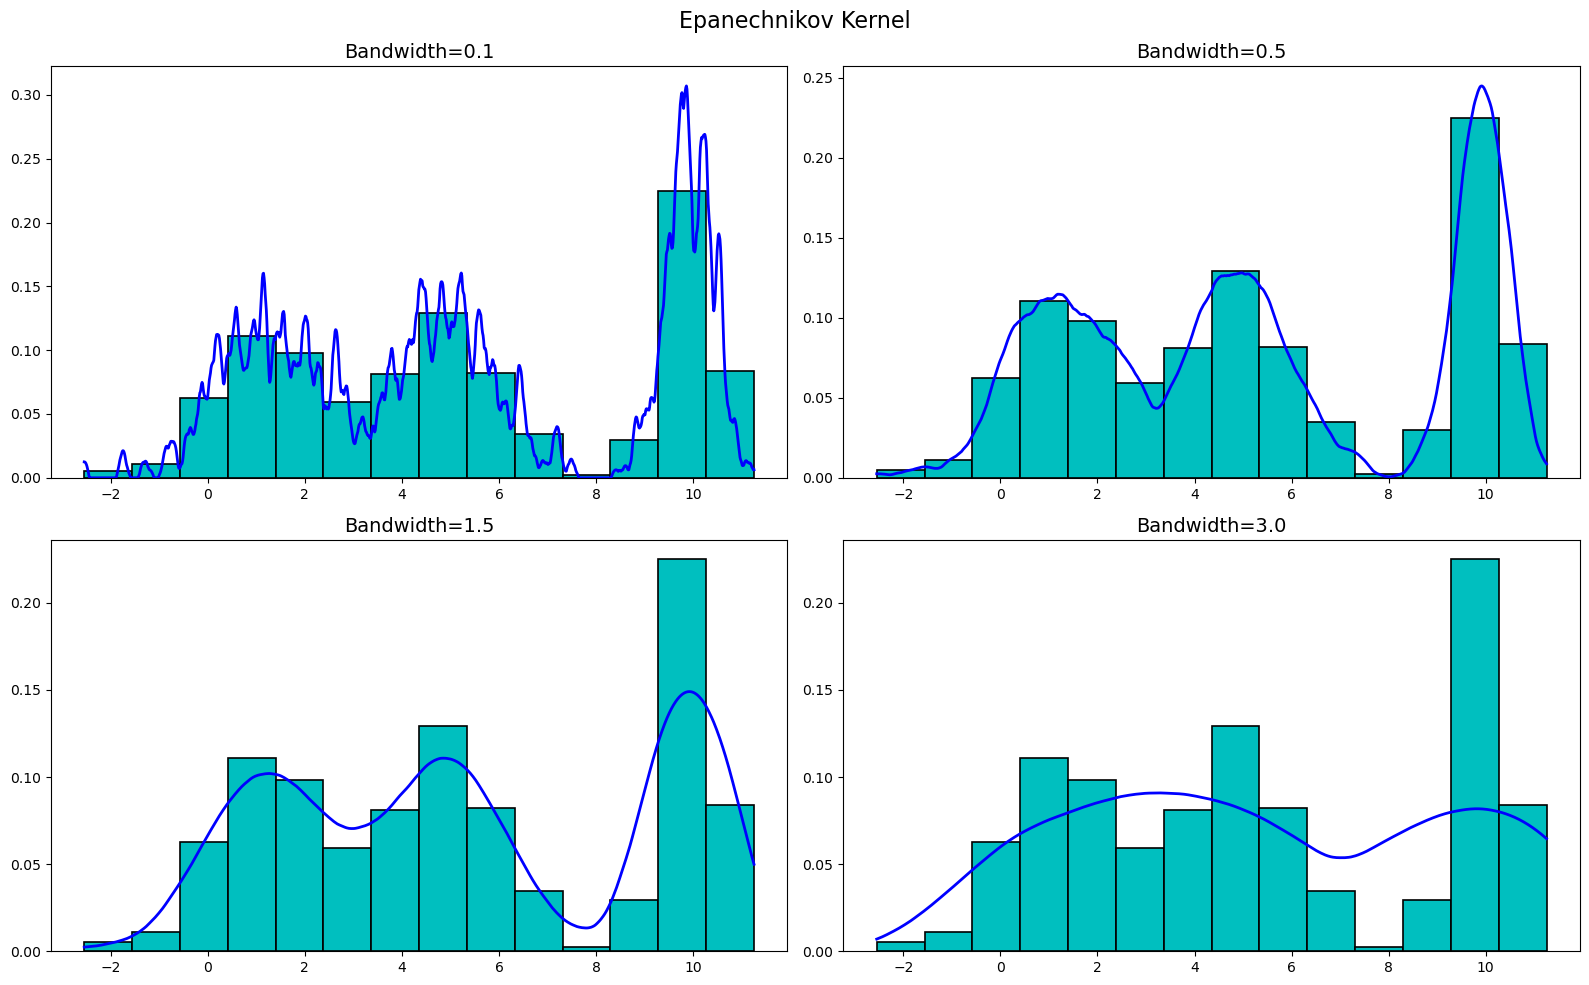

In [73]:
# Define initial variables
bandwidths = [0.1, 0.5, 1.5, 3.0]
x_vals = np.linspace(min(x), max(x), 1200)

# Plot the unform kernel KDE
fig, ax = plt.subplots(2, 2, figsize=(16, 10), dpi=100)
for bw in bandwidths:
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].plot(x_vals, kde(x_vals, x, bw, epanechnikov), 'b', linewidth=2)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].hist(x, bins=14, color='c', edgecolor='black', linewidth=1.2, density=True)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].set_title(f'Bandwidth={bw}', fontsize=14)

plt.suptitle('Epanechnikov Kernel', fontsize=16)
plt.tight_layout()
plt.show()

<h2>Gaussian Kernel</h2>

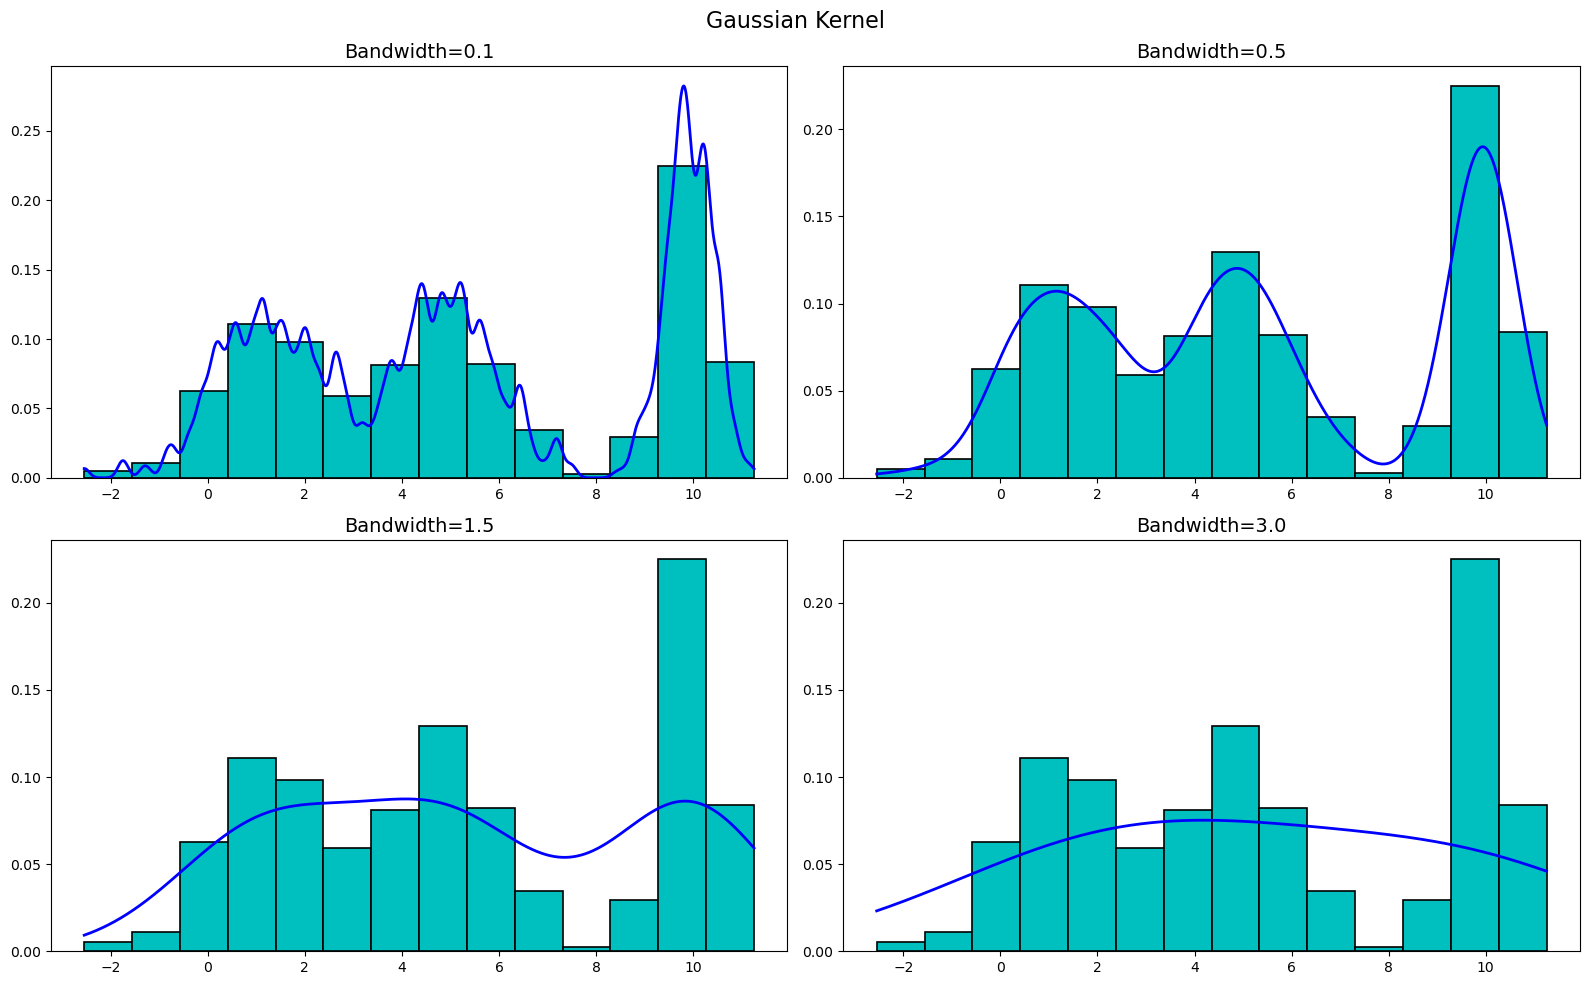

In [74]:
# Define initial variables
bandwidths = [0.1, 0.5, 1.5, 3.0]
x_vals = np.linspace(min(x), max(x), 1200)

# Plot the unform kernel KDE
fig, ax = plt.subplots(2, 2, figsize=(16, 10), dpi=100)
for bw in bandwidths:
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].plot(x_vals, kde(x_vals, x, bw, gaussian), 'b', linewidth=2)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].hist(x, bins=14, color='c', edgecolor='black', linewidth=1.2, density=True)
    ax[bandwidths.index(bw) // 2][bandwidths.index(bw) % 2].set_title(f'Bandwidth={bw}', fontsize=14)

plt.suptitle('Gaussian Kernel', fontsize=16)
plt.tight_layout()
plt.show()